## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [3]:
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
data = pd.read_csv("EasyVisa.csv")

In [5]:
data_1 = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [6]:
data_1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [7]:
data_1.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


#### Understand the shape of the dataset

In [8]:
data_1.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [9]:
data_1.shape

(25480, 12)

In [10]:
data_1.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [11]:
data_1.duplicated().sum()

0

In [12]:
data_1.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [13]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


#### Fixing the negative values in number of employees columns

In [14]:
data_1['no_of_employees'] = abs(data['no_of_employees'])

#### Let's check the count of each unique category in each of the categorical variables

In [15]:
cat_col = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "unit_of_wage",
    "case_status",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data_1[column].value_counts())
    print("-" * 40)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
----------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
----------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
----------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
------------------

### Univariate Analysis

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

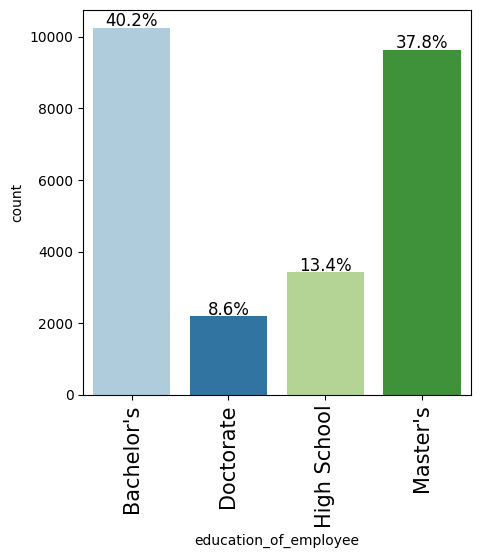

In [18]:
labeled_barplot(data_1, "education_of_employee", perc=True)

majority of applicants have Bachelor and Master.
8.6% also have PhD.

#### Observations on region of employment

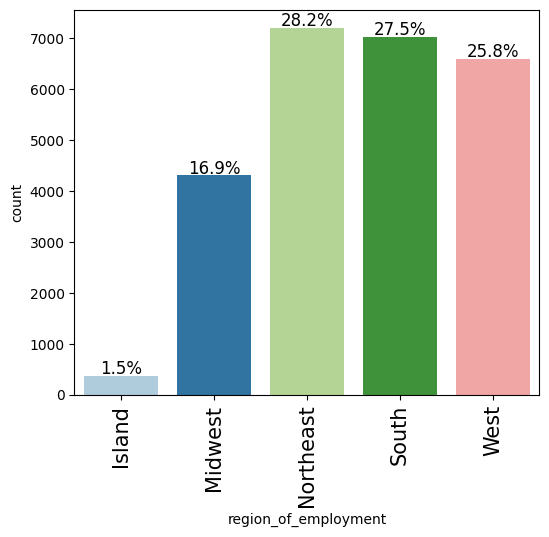

In [19]:
labeled_barplot(data, "region_of_employment", perc=True)

Northeast, South and west  equal number of applicants.
island has only 1.5% applicant.

#### Observations on job experience

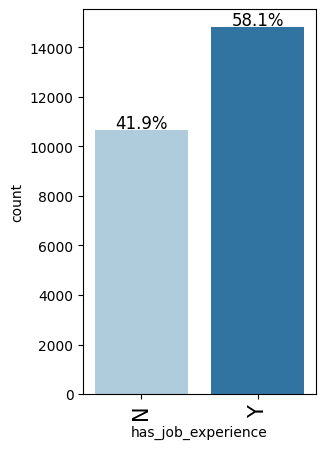

In [20]:
labeled_barplot(data, "has_job_experience", perc=True)

58.1% of applicants have job experience.

#### Observations on case status

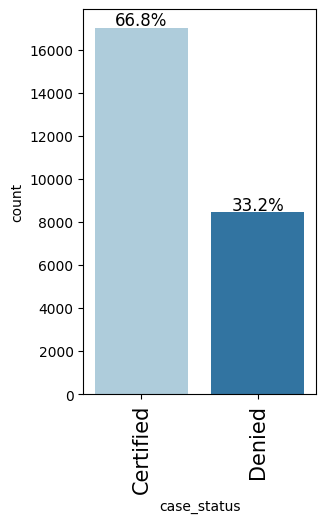

In [21]:
labeled_barplot(data, "case_status", perc=True)

66.8% of visa application are approved.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [72]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Find the correlation between the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees            1.000       -0.018           -0.010
yr_of_estab               -0.018        1.000            0.012
prevailing_wage           -0.010        0.012            1.000


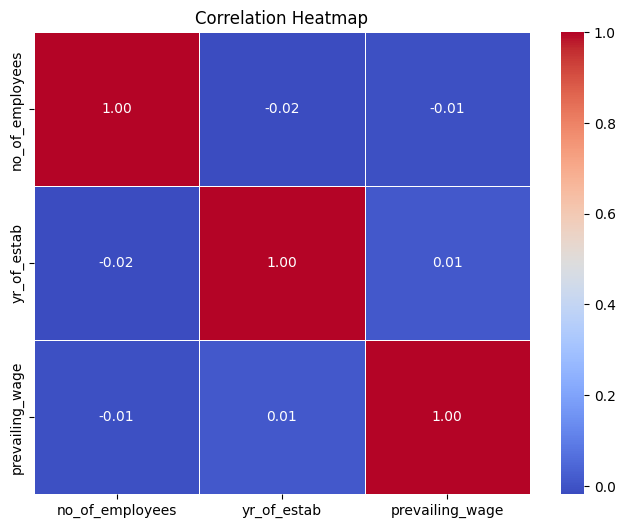

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set heatmap title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

This indicates a weak correlation or almost no linear relationship

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


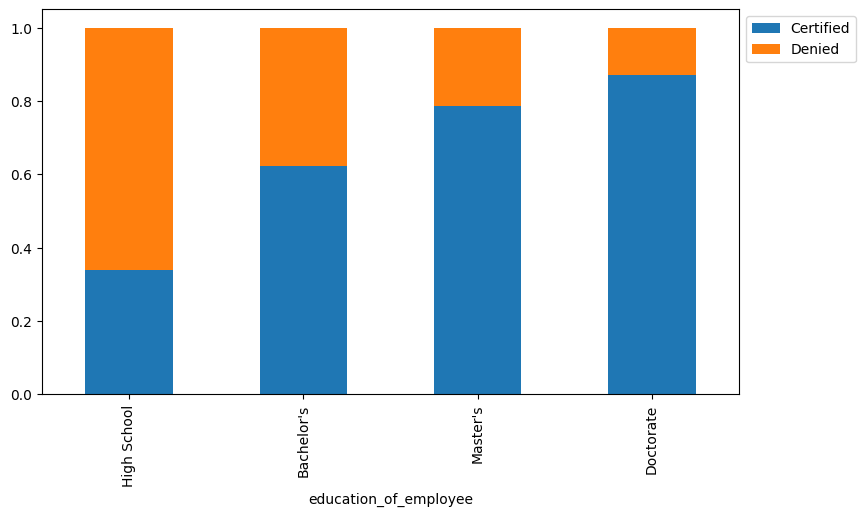

In [24]:
stacked_barplot(data, "education_of_employee", "case_status")

higher education has ahigher chance of visa approval.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


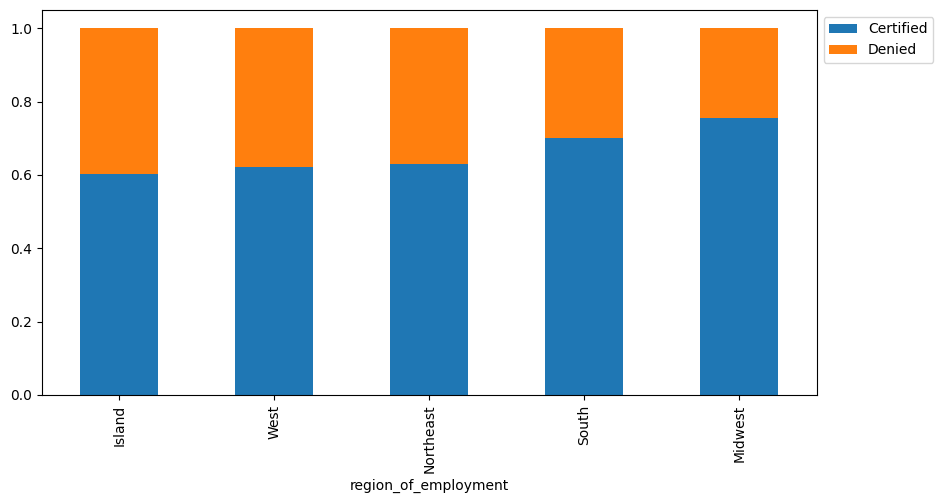

In [25]:
stacked_barplot(data, "region_of_employment", "case_status")

it seems that there not such big difference between different continent.
chance of approval for midwest is higher.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


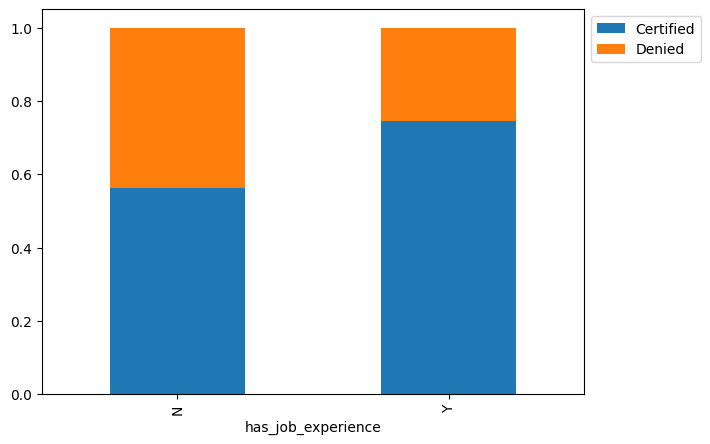

In [26]:
stacked_barplot(data, "has_job_experience", "case_status")

Applicants with job experienced, has a higher chance of visa approval.

#### Checking if the prevailing wage is similar across all the regions of the US

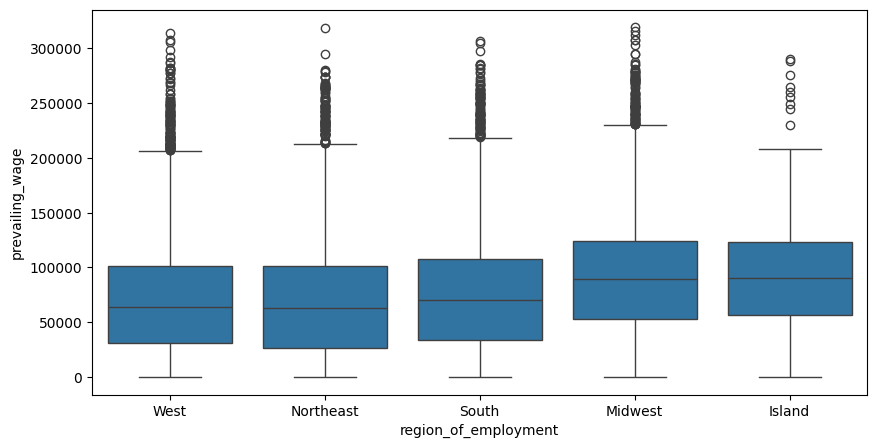

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

Midwest and Island have slightly higher median wages compared to other regions.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

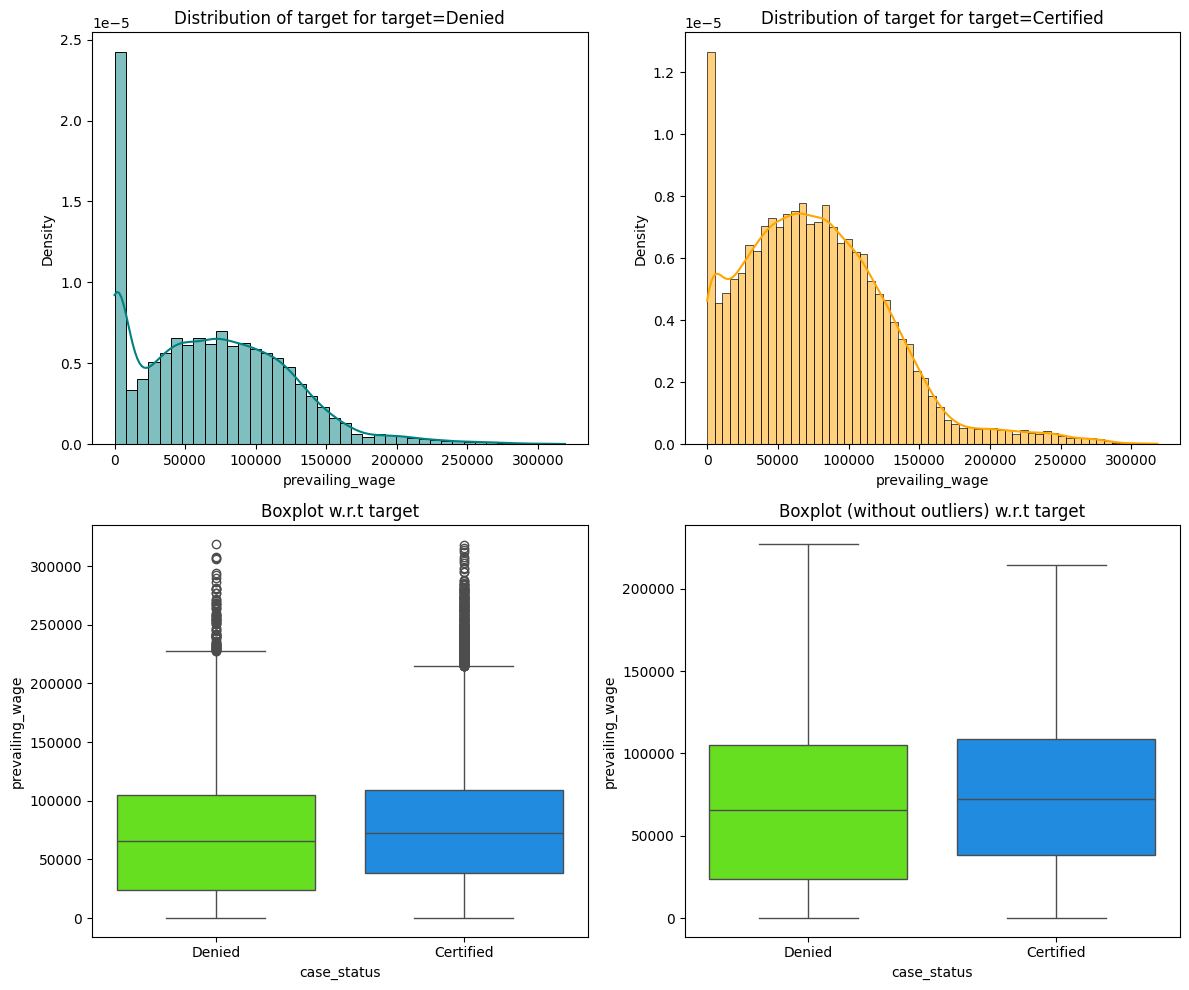

In [28]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

the median prevailing wage is higher for certified applications.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


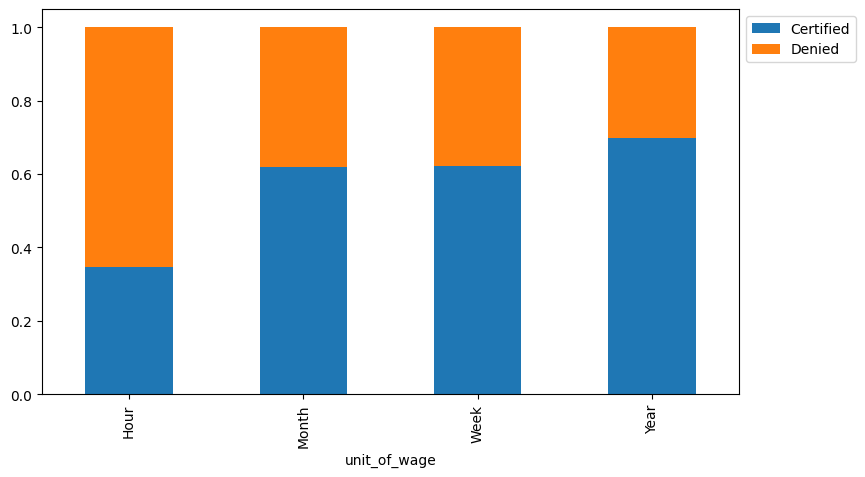

In [29]:
stacked_barplot(data, "unit_of_wage", "case_status")

Probality of visa certified is higher for yearly wage in compare to others.

## Data Pre-processing

### Outlier Check

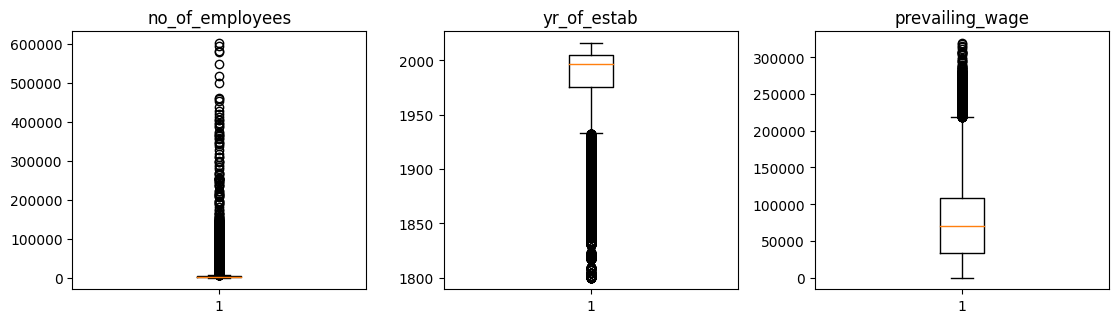

In [30]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

In [31]:
X = data_1.drop(["case_status"], axis=1)
Y = data_1["case_status"]

# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)

In [32]:
X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=1, stratify=Y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 25500) (5096, 25500) (5096, 25500)


## Model Building

### Model Evaluation Criterion

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [35]:
Y_train = Y_train.map({'Denied': 0, 'Certified': 1})
Y_val = Y_val.map({'Denied': 0, 'Certified': 1})

In [35]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, Y_train)
    scores = recall_score(Y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, Y_train)
    scores_val = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9694447164822251
Random forest: 1.0
GBM: 0.8845362843991773
Adaboost: 0.8890412300460288
dtree: 1.0

Validation Performance:

Bagging: 0.7625624449015574
Random forest: 0.874816338524831
GBM: 0.8627681457537467
Adaboost: 0.8677637378783426
dtree: 0.7293564501910079


In [74]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, Y_train)
    scores_train = recall_score(Y_train, model.predict(X_train))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9694, Validation Score: 0.7626, Difference: 0.2069
Random forest: Training Score: 1.0000, Validation Score: 0.8748, Difference: 0.1252
GBM: Training Score: 0.8845, Validation Score: 0.8628, Difference: 0.0218
Adaboost: Training Score: 0.8890, Validation Score: 0.8678, Difference: 0.0213
dtree: Training Score: 1.0000, Validation Score: 0.7294, Difference: 0.2706


GBM and Adaboost both are good and acceptable.

### Model Building with oversampled data

In [37]:
from imblearn.over_sampling import RandomOverSampler

print("Before Oversampling, counts of label 'Certified': {}".format(sum(Y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(Y_train == 0)))

ros = RandomOverSampler(sampling_strategy=0.6, random_state=1)
 # Synthetic Minority Over Sampling Technique
X_train_over, Y_train_over = ros.fit_resample(X_train, Y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(Y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(Y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(Y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10211
Before Oversampling, counts of label 'Denied': 5077 

After Oversampling, counts of label 'Certified': 10211
After Oversampling, counts of label 'Denied': 6126 

After Oversampling, the shape of train_X: (16337, 25500)
After Oversampling, the shape of train_y: (16337,) 



In [39]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, Y_train_over)
    scores = recall_score(Y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, Y_train_over)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9657232396435217
Random forest: 1.0
GBM: 0.8698462442464009
Adaboost: 0.8683772402311233
dtree: 1.0

Validation Performance:

Bagging: 0.7549221275345284
Random forest: 0.8574786952688804
GBM: 0.850426094622392
Adaboost: 0.8463120775786072
dtree: 0.7431677931237144


In [47]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, Y_train_over)
    scores_train = recall_score(Y_train_over, model.predict(X_train_over))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9657, Validation Score: 0.7549, Difference: 0.2108
Random forest: Training Score: 1.0000, Validation Score: 0.8575, Difference: 0.1425
GBM: Training Score: 0.8698, Validation Score: 0.8504, Difference: 0.0194
Adaboost: Training Score: 0.8684, Validation Score: 0.8463, Difference: 0.0221
dtree: Training Score: 1.0000, Validation Score: 0.7432, Difference: 0.2568


GBM and Adaboost are the best model for oversampling

### Model Building with undersampled data

In [42]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_un, Y_train_un = rus.fit_resample(X_train, Y_train)

In [44]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(Y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(Y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(Y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(Y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(Y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10211
Before Under Sampling, counts of label 'Denied': 5077 

After Under Sampling, counts of label 'Certified': 5077
After Under Sampling, counts of label 'Denied': 5077 

After Under Sampling, the shape of train_X: (10154, 25500)
After Under Sampling, the shape of train_y: (10154,) 



In [45]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, Y_train_un)
    scores = recall_score(Y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, Y_train_un)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9576521567855032
Random forest: 1.0
GBM: 0.7289738034272208
Adaboost: 0.7098680323025409
dtree: 1.0

Validation Performance:

Bagging: 0.6626506024096386
Random forest: 0.694093446958566
GBM: 0.7055539230091096
Adaboost: 0.6946811636791067
dtree: 0.6508962679988246


In [46]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, Y_train_un)
    scores_train = recall_score(Y_train_un, model.predict(X_train_un))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9577, Validation Score: 0.6627, Difference: 0.2950
Random forest: Training Score: 1.0000, Validation Score: 0.6941, Difference: 0.3059
GBM: Training Score: 0.7290, Validation Score: 0.7056, Difference: 0.0234
Adaboost: Training Score: 0.7099, Validation Score: 0.6947, Difference: 0.0152
dtree: Training Score: 1.0000, Validation Score: 0.6509, Difference: 0.3491


for undersampling, GBM and Adaboost are best as well.

Between all 15 the GBM and Adaboost are the best.
I will go for tunning with Adaboost since the dataset are big here and GBM took alot time to run.

## Hyperparameter Tuning

Tuning AdaBoostClassifier model with Undersampled data



In [52]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 20, 30),
    "learning_rate": [0.1, 0.5,1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1)
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=10, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, Y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.8920630864492322:
CPU times: user 19.1 s, sys: 5.84 s, total: 24.9 s
Wall time: 5min 34s


In [53]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_train_un, Y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [54]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, Y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.648,0.896,0.599,0.718


In [56]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, Y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.723,0.876,0.751,0.808


Tuning AdaBoostClassifier model with oversampled data

In [57]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 20, 30),
    "learning_rate": [0.1, 0.5,1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1)
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=10, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, Y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9324262456377342:
CPU times: user 37.9 s, sys: 13.3 s, total: 51.2 s
Wall time: 10min 3s


In [58]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_train_over, Y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [59]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(tuned_adb, X_train_un, Y_train_un)
adb_train2

,Accuracy,Recall,Precision,F1
0,0.599,0.934,0.559,0.700


In [60]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_adb, X_val, Y_val)
adb_val2

,Accuracy,Recall,Precision,F1
0,0.705,0.920,0.718,0.806


## Model Performances

In [63]:
#training performance comparison

models_train_comp_df = pd.concat(
    [

        adb_train.T,
        adb_train2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.648,0.599
Recall,0.896,0.934
Precision,0.599,0.559
F1,0.718,0.700


In [64]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [adb_val.T, adb_val2.T], axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.723,0.705
Recall,0.876,0.920
Precision,0.751,0.718
F1,0.808,0.806


As recall increased in oversample and F1 is pretty the same in both. I will go with oversampled.

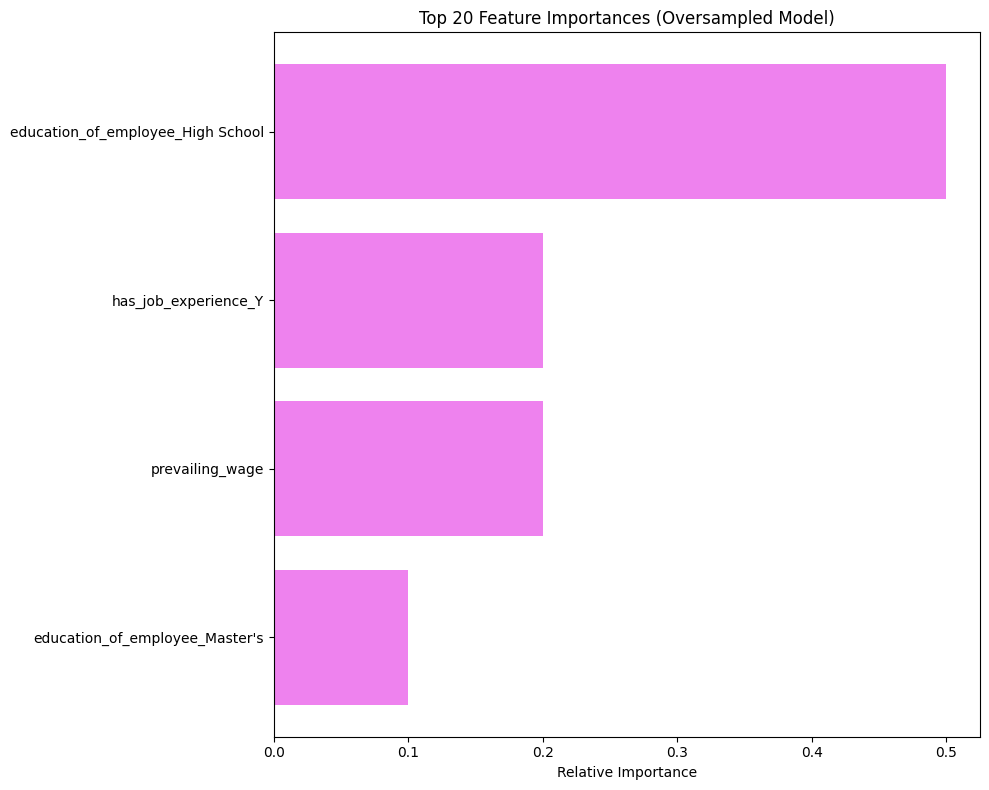

In [68]:
importances = tuned_adb.feature_importances_

# Filter non-zero importances only
nonzero_indices = np.where(importances > 0)[0]

# If no features used at all:
if len(nonzero_indices) == 0:
    print("All feature importances are zero. Check if model was trained or dataset mismatch.")
else:
    # Sort and select top 20
    top_indices = nonzero_indices[np.argsort(importances[nonzero_indices])[-20:]]
    feature_names = X_train_over.columns  # Make sure this matches the dataset used in training

    # Plot
    plt.figure(figsize=(10, 8))
    plt.title("Top 20 Feature Importances (Oversampled Model)")
    plt.barh(range(len(top_indices)), importances[top_indices], color="violet", align="center")
    plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
    plt.xlabel("Relative Importance")
    plt.tight_layout()
    plt.show()


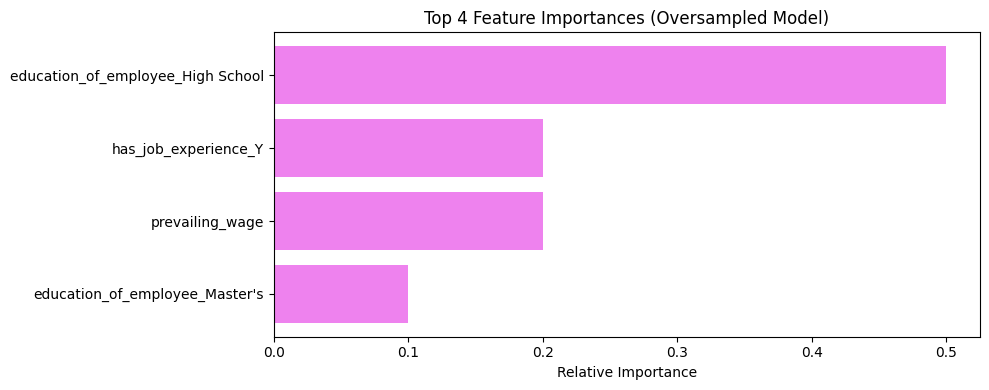

In [70]:
importances = tuned_adb.feature_importances_
feature_names = X_train_over.columns

# Only keep non-zero importances
nonzero_indices = np.where(importances > 0)[0]

# Sort by importance
top_indices = nonzero_indices[np.argsort(importances[nonzero_indices])]

# Get the correct number of bars
num_features = len(top_indices)

# Plot
plt.figure(figsize=(10, max(4, num_features * 0.5)))  # dynamic height
plt.title(f"Top {num_features} Feature Importances (Oversampled Model)")
plt.barh(range(num_features), importances[top_indices], color="violet", align="center")
plt.yticks(range(num_features), [feature_names[i] for i in top_indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [69]:
print(np.sort(tuned_adb.feature_importances_)[-10:])

[0.  0.  0.  0.  0.  0.  0.1 0.2 0.2 0.5]


## Actionable Insights and Recommendations

1-based on the model the four important features between all features is education of employee, privilage wage and job experience have most effect in the certfied , or denied visa.

2- higher education level has better chance for visa approval.
3-having job experience increasing the chance of approval as well.

4- has a high prevailing wage most likely yearly has higher chance as well

<font size=6 color='blue'>Power Ahead</font>
___